In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv
/kaggle/input/heart-disease/heart_disease.csv
/kaggle/input/hr-analytics-prediction/HR-Employee-Attrition.csv
/kaggle/input/creditcardfraud/creditcard.csv
/kaggle/input/hospital-readmissions/hospital_readmissions.csv


# Implimenting Different Classifiers

In this Notebook, I will impliment different Classifiers and by using Different Datasets. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import roc_auc_score
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## Creating Functions

In [3]:
def check_null(data):
    if data.isnull().sum().sum():
        print("There are nulls in the data")
        print(data.isnull().sum())
        print("Data size before : " , data.size)
        # As main idea is to make code reusable and train different ml models
        data = data.dropna()
        print("Data size after : " , data.size)
        
    else:
        print("There are no nulls in the data.")

    return data

def cat_int_cols(data, target):
    # data = data.drop(target, axis=1)
    cat_col = data.select_dtypes(include=['object']).columns
    int_col = data.select_dtypes(include=['int64', 'float64']).columns
    return cat_col, int_col

In [4]:
def encode_target_bin(data, col):
    print(f"{data[col].unique()[-1]} is encoded as 0, and {data[col].unique()[-2]} is encoded as 1")
    data[col] = data[col].map({data[col].unique()[-1]:0, data[col].unique()[-2]:1})
    data[col] = data[col].astype(int)
    
    
def encode_cat(data, cols, int_coll):
    ohe = OneHotEncoder(drop='first', sparse_output=False)
    encoded = ohe.fit_transform(data[cols])
    encoded_col = ohe.get_feature_names_out(cols)
    data_updated = pd.DataFrame(encoded, columns=encoded_col, index=data.index)
    data = pd.concat([data[int_coll], data_updated], axis=1)
    return data

def data_split(data, target, stan=False):
    X = data.drop(target, axis=1)
    Y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    if stan:
        X_train, X_test = Standard(X_train, X_test)

    return X_train, X_test, y_train, y_test 

def Standard(train, test):
    st = StandardScaler()
    train = st.fit_transform(train)
    test = st.transform(test)
    return train, test

## Logistic Regression on HR Dataset

In [ ]:
hr = pd.read_csv("/kaggle/input/hr-analytics-prediction/HR-Employee-Attrition.csv")
print("Size of the data is ", hr.shape)
pd.set_option('display.max_columns', None)
hr.head()

Size of the data is  (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
# Checking if the data has nulls 
hr = check_null(hr)

# Encode Target Values First 
encode_target_bin(hr, 'Attrition')
print("Data After Label Encoding")
hr.head()

There are no nulls in the data.
No is encoded as 0, and Yes is encoded as 1
Data After Label Encoding


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
cat_col, int_col = cat_int_cols(hr, "Attrition")

In [8]:
hr = encode_cat(hr, cat_col, int_col)
# Converted all columns to integer columns
hr.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
target = 'Attrition'

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def performance(pred, actual):
    acc = accuracy_score(pred, actual)
    prec = precision_score(pred, actual)
    rec = recall_score(pred, actual)
    f1 = f1_score(pred, actual)
    con = confusion_matrix(pred, actual)
    return acc, prec, rec, f1

In [10]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = data_split(hr, target)

X_train, X_test = Standard(X_train, X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

acc, prec, rec, f1 = performance(y_pred, y_test)
print("Accuracy Score is : ", acc*100)
print("Precision Score is (0 - 1): ", prec)
print("Recall Score is (0 - 1): ", rec )
print("F1-Score Score is (0 - 1): ", f1)

Accuracy Score is :  88.43537414965986
Precision Score is (0 - 1):  0.46153846153846156
Recall Score is (0 - 1):  0.5806451612903226
F1-Score Score is (0 - 1):  0.5142857142857143


## KNN on Heart Disease Dataset

In [11]:
hrt = pd.read_csv("/kaggle/input/heart-disease/heart_disease.csv")
print("Shape of the dataset is : ", hrt.shape)
hrt.head()

Shape of the dataset is :  (10000, 21)


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [12]:
hrt = check_null(hrt)
# Removing nulls values are main idea is to classify data 

There are nulls in the data
Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64
Data size before :  210000
Data size after :  148407


In [13]:
encode_target_bin(hrt, 'Heart Disease Status')
hrt.head()

Yes is encoded as 0, and No is encoded as 1


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,1
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,1
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,1
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,1
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,No,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,1


In [14]:
cat_col, int_col = cat_int_cols(hrt, "Heart Disease Status")
print(cat_col)

print("------"* 15)
print(int_col)

Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption'],
      dtype='object')
------------------------------------------------------------------------------------------
Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')


In [15]:
hrt = encode_cat(hrt, cat_col, int_col)
hr.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = data_split(hrt, "Heart Disease Status")
X_train, X_test = Standard(X_train, X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc, _, _, _ = performance(y_pred, y_test)
print("Accuracy of KNN is : ", acc)

y_proba = knn.predict_proba(X_test)[:, 1]

print("ROC_AUC Score is : ", roc_auc_score( y_test, y_proba))


Accuracy of KNN is :  0.7659123055162659
ROC_AUC Score is :  0.514170977278332


## Hospital Readmission using Logistic Regression

In [17]:
hosp = pd.read_csv("/kaggle/input/hospital-readmissions/hospital_readmissions.csv")
print("Shape of the dataset is : ", hosp.shape)
hosp.head()

Shape of the dataset is :  (25000, 17)


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [18]:
target3 = "readmitted"
hosp = check_null(hosp)
encode_target_bin(hosp, target3)

There are no nulls in the data.
yes is encoded as 0, and no is encoded as 1


In [19]:
cat_col, int_col = cat_int_cols(hosp, target3)

hosp = encode_cat(hosp, cat_col, int_col)
hosp.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,readmitted,age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Missing,medical_specialty_Other,medical_specialty_Surgery,diag_1_Diabetes,diag_1_Digestive,diag_1_Injury,diag_1_Missing,diag_1_Musculoskeletal,diag_1_Other,diag_1_Respiratory,diag_2_Diabetes,diag_2_Digestive,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Other,diag_2_Respiratory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,glucose_test_no,glucose_test_normal,A1Ctest_no,A1Ctest_normal,change_yes,diabetes_med_yes
0,8,72,1,18,2,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,3,34,2,13,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,5,45,0,18,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2,36,0,12,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,1,42,0,7,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [20]:
X_train, X_test, y_train, y_test = data_split(hosp, target3)

X_train, X_test = Standard(X_train, X_test)

lr2 = LogisticRegression()
lr2.fit(X_train, y_train)

y_pred = lr2.predict(X_test)

acc, prec, rec, f1 = performance(y_pred, y_test)
print("Precision Score is ; ", prec)
print("Recall Score is ; ", rec)
print("F1-Score Score is ; ", f1)

Precision Score is ;  0.7832957110609481
Recall Score is ;  0.6024305555555556
F1-Score Score is ;  0.6810598626104024


## Decision Tree on Credit Card Fraud Detection

In [21]:
credit = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
print("Shape of the dataset is : ", credit.shape)
credit.head()

Shape of the dataset is :  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
credit = check_null(credit)
tar4 = "Class"

There are no nulls in the data.


In [23]:
cat_col, int_col = cat_int_cols(credit, tar4)
print("Categorical Columns are: ")
print(cat_col)
print("--------"* 15)
print("Non-Categorical Columns are: ")
print(int_col)

Categorical Columns are: 
Index([], dtype='object')
------------------------------------------------------------------------------------------------------------------------
Non-Categorical Columns are: 
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [24]:
# As there are no categorical columns, we don't have to encode categorical columns

X_train, X_test, y_train, y_test = data_split(credit, tar4)

X_train, X_test = Standard(X_train, X_test)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

y_proba = dt.predict_proba(X_test)[:, 1]

roc = roc_auc_score(y_proba, y_test)
print("ROC_AUC Score is : ", roc)

ROC_AUC Score is :  0.8543695592383413


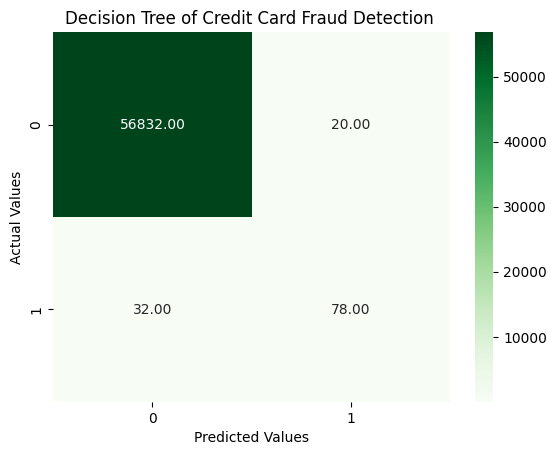

In [25]:
sns.heatmap(confusion_matrix(y_pred, y_test), fmt=".2f", annot=True, cmap='Greens')
plt.title("Decision Tree of Credit Card Fraud Detection ")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Thsi is happening because data is too distributed and only have a very less 0 values. 

## Classifing Wine Quality Using DT

In [26]:
wine = pd.read_csv("/kaggle/input/wine-quality/winequalityN.csv")
print("Shape of the dataset is : ", wine.shape)
wine.head()

Shape of the dataset is :  (6497, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [28]:
wine = check_null(wine)
tar5 = "quality"

cat_col, int_col = cat_int_cols(wine, tar4)
print("Categorical Columns are: ")
print(cat_col)
print("--------"* 15)
print("Non-Categorical Columns are: ")
print(int_col)

There are nulls in the data
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64
Data size before :  84461
Data size after :  84019
Categorical Columns are: 
Index(['type'], dtype='object')
------------------------------------------------------------------------------------------------------------------------
Non-Categorical Columns are: 
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [29]:
wine = encode_cat(wine, cat_col, int_col)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1.0


In [30]:
X_train, X_test, y_train, y_test = data_split(wine, tar5)

X_train, X_test = Standard(X_train, X_test)

from sklearn.tree import DecisionTreeClassifier

dt2 = DecisionTreeClassifier()
dt2.fit(X_train, y_train)
y_pred = dt2.predict(X_test)

y_proba = dt2.predict_proba(X_test)[:,1]

prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
print("Accuracy Score is : ", acc)
print("Precision Score is : ", prec)
print("Recall Score is : ", rec)

print("ROC-AUC Score is : ", roc_auc_score(y_proba, y_test))

Accuracy Score is :  0.61
Precision Score is :  0.5521517753406797
Recall Score is :  0.5583913379737045
ROC-AUC Score is :  0.2936387686387686


## Iris Dataset

In [31]:
from sklearn.datasets import load_iris

iris_df = load_iris()

iris = pd.DataFrame(iris_df.data, columns = iris_df.feature_names)
iris['target'] = iris_df.target
print("Shape of the dataset is : ", iris.shape)
iris.head()

Shape of the dataset is :  (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
iris = check_null(iris)

X_train, X_test, y_train, y_test = data_split(wine, tar5)

X_train, X_test = Standard(X_train, X_test)

from sklearn.tree import DecisionTreeClassifier

dt3 = DecisionTreeClassifier()
dt3.fit(X_train, y_train)
y_pred = dt3.predict(X_test)

There are no nulls in the data.


In [33]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")

print("Accuracy Score is : ", acc)
print("Precision Score is : ", prec)
print("Recall Score is : ", rec)


Accuracy Score is :  0.5614849187935035
Precision Score is :  0.553572420724226
Recall Score is :  0.5614849187935035
